In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Theta from direct approach:  [[10321.44207806]
 [   94.4776604 ]]


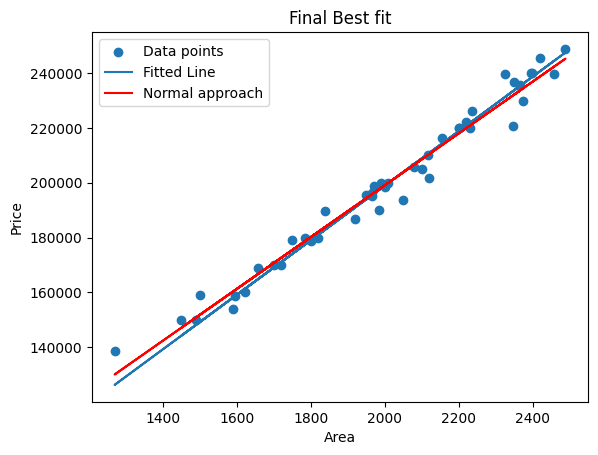

In [13]:
data=np.loadtxt('dataset.txt',delimiter=',')
y=data[:,1].reshape(45,1)
x=data[:,0].reshape(y.size,1) #(45,1)

# theta output taken from the final minimum theta
theta0= -44.89863573
theta1=  99.48143224

#theta from Normal approach without iteration
#  [[10034.94852841]
#  [   94.52335647]]

# [[-9.58616590e+09]
#  [-3.82875527e+08]]

predicted =theta0 +theta1*x
plt.scatter(x,y,label='Data points')
plt.plot(x,predicted,label='Fitted Line')
plt.plot(x,(10034.94852841+94.52335647*x),color='red',label='Normal approach')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title("Final Best fit")
plt.legend()
plt.show



new_row=np.ones((x.shape[0],1))
# now concatenate the new row with the original feature:
x=np.hstack((new_row,x))
# print(x.shape)
# print(y.shape)
# print(x)

# normal method to get min theta without iterative approach (suitable for small as large computation in matrix)
# Keep in mind that in practical applications, computing matrix inverses directly may not be the most efficient approach, especially for larger matrices. It's often preferable to use matrix decompositions or other methods for solving linear systems. Also, handling potential issues with singular or ill-conditioned matrices is important in numerical computations.
part1=np.linalg.inv(np.dot(x.T,x))
part2=np.dot(x.T,y)
theta=np.dot(part1,part2)
print('Theta from direct approach: ',theta)


# x=x.reshape(x.size,2) # wrong

In [11]:
# Stochastic Gradient descent learning
# def model(x,y,learning_rate,iteration):
#     theta=np.zeros((2,1))
#     cost_list=[]
#     for _ in range(iteration):
#         y_pred=np.dot(x,theta)
#         # print('theta: ',theta)
    
#         cost=(1/2)*np.sum(np.square(y_pred-y)) # can also use mean instead of sum
#         cost_list.append(cost)
#         print('cost: ',cost)
#         for i in range(x.shape[0]):
#             h_theta=np.dot(x[i],theta)
#             for j in range(2):
#                 theta[j]=theta[j]+learning_rate*(y[i]-h_theta)*x[i][j]
#     return theta,cost_list


# Batch Gradient descent learning
def model(x,y,learning_rate,iteration):
    theta=np.zeros((2,1))
    cost_list=[]
    h_theta=np.empty(shape=x.shape[0])
    mid_term=np.empty(shape=x.shape[0])
    for _ in range(iteration):
        y_pred=np.dot(x,theta)
        # print('theta: ',theta)
        cost=(1/2)*np.sum(np.square(y_pred-y))
        cost_list.append(cost)
        # print('cost: ',cost)
        for j in range(2):
            # print(mid_term.shape)
            for i in range(x.shape[0]):
                h_theta[i]=np.dot(x[i],theta)
                mid_term[i]=(h_theta[i]-y[i])*x[i][j]
            theta[j]=theta[j]-learning_rate*(np.sum(mid_term))
            # print((np.sum(mid_term)).shape)
    return theta,cost_list


#without using two for loops in stochastic form :
# def model(x,y,learning_rate,iteration):
#     theta=np.zeros((2,1))
#     cost_list=[]
#     for _ in range(iteration):
#         y_pred=np.dot(x,theta)
#         # print('theta: ',theta)
    
#         cost=(1/2)*np.sum(np.square(y_pred-y))
#         cost_list.append(cost)
#         # print('cost: ',cost)
     
#         h_theta=np.dot(x,theta)
#         theta=theta+(learning_rate*np.dot(((y-h_theta).T),x)).T
#     return theta,cost_list



Theta from iterative apporach:  [[4.97017689e-02]
 [9.95223259e+01]]
[221934.83635318]


C:\Users\rahul\AppData\Local\Temp\ipykernel_1984\3797920701.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h_theta[i]=np.dot(x[i],theta)
C:\Users\rahul\AppData\Local\Temp\ipykernel_1984\3797920701.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mid_term[i]=(h_theta[i]-y[i])*x[i][j]


<function matplotlib.pyplot.show(close=None, block=None)>

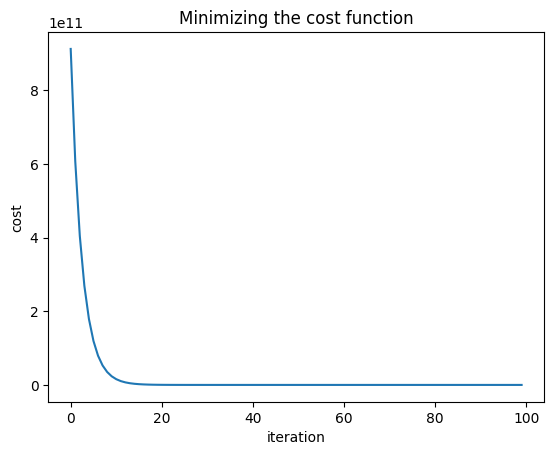

In [12]:
theta,cost=model(x,y,0.000000001,100)
print('Theta from iterative apporach: ',theta)
test_result=np.dot([1,2230],theta)
# cost=cost[::100] #[start:stop:step]
rng=np.arange(0,100)
print(test_result)

plt.plot(rng,cost)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Minimizing the cost function')
plt.show